Rafał Nowak
# Numerical Optimization
## Problem set 1 (20 points)

**Submission deadline**: Tuesday, 29.10.2020

* All submissions should contain single file.<br/>This can be single Jupyter notebook file (with extension `ipynb`) or ZIP archive in case the are some additional files needed.
* It is recommended to write the reports using LaTeX. 
* One can report the answers, comments and results in PDF or notebook file.
* All the source code should be written in Python or Julia.

Mateusz Markiewicz, 298653

In [1]:
import numpy as np
import numpy.linalg as npl
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from scipy.linalg import hilbert

### **Problem 1.1 (5 pts)**

In this problem you are going to solve the system of linear equations $Ax=b$, where $A\in \mathbb R^{n\times n}$, $b\in\mathbb R^n$ are given.

1. Implement the [Gauss elimination algorithm](https://www.wikiwand.com/en/Gaussian_elimination) that solves the system $Ax=b$. 
> `x = solve(A,b)`
2. Test your algorithm with built-in solver (see [`\`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.:\-Tuple{AbstractArray{T,2}%20where%20T,Union{AbstractArray{T,1},%20AbstractArray{T,2}}%20where%20T}) in Julia for example).<br/>
One can perform the tests by taking $b := Ax$ for somehow generated vector (solution) $x\in\mathbb R^n$.
3. Experiment with different kind of matrices $A$: symmetric, (2,3-)diagonal, Hilbert, positive definite, ..., 

#### Gauss elimination algorithm
A simple implementation of the Gauss elimination algorithm. 
Given:
$$\\A = 
\begin{bmatrix}
    A_{1,1} & A_{1,2} & A_{1,3} & \dots  & A_{1,n} \\
    A_{2,1} & A_{2,2} & A_{2,3} & \dots  & A_{2,n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    A_{n,1} & A_{n,2} & A_{n,3} & \dots  & A_{n,n} \\
\end{bmatrix}
\\
$$

$$b = 
\begin{bmatrix}
    b_{1}\\
    b_{2}\\
    \vdots \\
    b_{n}\\
\end{bmatrix}
$$

the algorithm goes as follow:
* create [A,b] matrix
* from i-th row subtract $\frac{A_{i,1}}{A_{1,1}}$ times first row
* as a results we get:

$$\\
\begin{bmatrix}
    A_{1,1} & A_{1,2} & A_{1,3} & \dots  & A_{1,n} & b_{1} \\
    0 & A'_{2,2} & A'_{2,3} & \dots  & A'_{2,n} & b'_{2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    0 & A'_{n,2} & A'_{n,3} & \dots  & A'_{n,n} & b'_{n} \\
\end{bmatrix}
\\
$$
* now we can repeat this process for matrix A without the first column and row, and finally we get:

$$\\
\begin{bmatrix}
    A_{1,1} & A_{1,2} & A_{1,3} & \dots  & A_{1,n} & b_{1} \\
    0 & A''_{2,2} & A''_{2,3} & \dots  & A''_{2,n} & b''_{2} \\
    0 & 0 & A''_{3,3} & \dots  & A''_{2,n} & b''_{2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & 0 & \dots  & A''_{n,n} & b''_{n} \\
\end{bmatrix}
\\
$$

Now we have to solve the system of linear equations with upper-triangular matrix A.
* $x_n$ is equal to $\frac{b''_n}{A''_{n,n}}$
* from i-th row we subtract $\frac{A_{i,n}}{A_{n,n}}$ times n-th row
* repeat this process starting from n - i-th row
* as a result we get

$$\\
\begin{bmatrix}
    1 & 0 & 0 & \dots  & 0 & b'''_{1} \\
    0 & 1 & 0 & \dots  & 0 & b'''_{2} \\
    0 & 0 & 1 & \dots  & 0 & b'''_{2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & 0 & \dots  & 1 & b'''_{n} \\
\end{bmatrix}
\\
$$

and as we can see our last column is equal to x vector.

In [22]:
def solve(A,b):
    n = A.shape[0]
    A = np.hstack((A,b.reshape(n,1))).astype(np.float64)
    for i in range(n-1):
        if A[i][i] == 0:
            k = np.argmax(A[i:,i])
            assert A[k][i] != 0
            A[i],A[k] = np.copy(A[k]), np.copy(A[i])
        for j in range(i+1,n):
            a = A[j][i]/A[i][i]
            A[j] -= a*A[i]
    for i in range(n-1,-1,-1):
        assert A[i][i] != 0
        A[i] /= A[i][i]
        for j in range(i):
            A[j] -= A[j][i]*A[i]
    return A[:,-1]

### Tests
I'll compare my implementation with numpy.linalg.solve

##### Simple tests:

(from https://www.matesfacil.com/english/high/solving-systems-by-Gaussian-Elimination.html website)

In [23]:
A = np.array([[5,2],[-3,3]])
b = np.array([3,15])
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1}, numpy solution: {x2}')

A matrix:
[[ 5  2]
 [-3  3]]
b vector:
[ 3 15]
My solution: [-1.  4.], numpy solution: [-1.  4.]


In [24]:
A = np.array([[5,2,0],[2,1,-1],[2,3,-1]])
b = np.array([2,0,3])
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1}, numpy solution: {x2}')

A matrix:
[[ 5  2  0]
 [ 2  1 -1]
 [ 2  3 -1]]
b vector:
[2 0 3]
My solution: [-0.2  1.5  1.1], numpy solution: [-0.2  1.5  1.1]


In [25]:
A = np.array([[1,2,-3,-1],[0,-3,2,6],[-3,-1,3,1],[2,3,2,-1]])
b = np.array([0,-8,0,-8])
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1}, numpy solution: {x2}')

A matrix:
[[ 1  2 -3 -1]
 [ 0 -3  2  6]
 [-3 -1  3  1]
 [ 2  3  2 -1]]
b vector:
[ 0 -8  0 -8]
My solution: [-1. -2. -1. -2.], numpy solution: [-1. -2. -1. -2.]


In [26]:
A = np.array([[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]])
b = np.array([1,2,3,4])
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1}, numpy solution: {x2}')

A matrix:
[[0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]]
b vector:
[1 2 3 4]
My solution: [2. 1. 3. 4.], numpy solution: [2. 1. 3. 4.]


##### Random matrix

In [27]:
A = np.random.randint(-1000,1000,(100,100))
b = np.random.randint(-1000,1000,(100,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(100,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')


N: 100, time of my computations: 0.05286, time of numpy computations: 0.98006,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 1.6423659950195984e-24


In [28]:
A = np.random.randint(-10000,10000,(1000,1000))
b = np.random.randint(-10000,10000,(1000,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 1000, time of my computations: 8.36699, time of numpy computations: 0.23347,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 2.767129709549145e-20


##### Symmetric matrix

In [29]:
def make_sym(A):
    At = np.tril(A)
    return At+At.T-np.diag(At.diagonal())

In [30]:
A = make_sym(np.array([[1,2,-3,-1],[0,-3,2,6],[-3,-1,3,1],[2,3,2,-1]]))
b = np.array([0,-8,0,-8])
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1}, numpy solution: {x2}')

A matrix:
[[ 1  0 -3  2]
 [ 0 -3 -1  3]
 [-3 -1  3  2]
 [ 2  3  2 -1]]
b vector:
[ 0 -8  0 -8]
My solution: [-4.67256637  1.69911504 -2.83185841 -1.91150442], numpy solution: [-4.67256637  1.69911504 -2.83185841 -1.91150442]


In [31]:
A = make_sym(np.random.randint(-1000,1000,(100,100)))
b = np.random.randint(-1000,1000,(100,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(100,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 100, time of my computations: 0.06035, time of numpy computations: 0.00099,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 5.81874215949422e-23


In [32]:
A = make_sym(np.random.randint(-10000,10000,(1000,1000)))
b = np.random.randint(-10000,10000,(1000,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 1000, time of my computations: 9.35307, time of numpy computations: 0.02593,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 1.6762445264437814e-21


In [33]:
A = make_sym(np.random.randint(-100,100,(1000,1000)))
b = np.random.randint(-100,100,(1000,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 1000, time of my computations: 8.18629, time of numpy computations: 0.0249,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 1.7291129675749449e-22


##### (2,3-)diagonal

In [34]:
A = make_sym(np.array([[1,0,0,0],[0,-3,0,0],[0,0,3,0],[0,0,0,-1]]))
b = np.array([0,-8,0,-8])
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1}, numpy solution: {x2}')

A matrix:
[[ 1  0  0  0]
 [ 0 -3  0  0]
 [ 0  0  3  0]
 [ 0  0  0 -1]]
b vector:
[ 0 -8  0 -8]
My solution: [0.         2.66666667 0.         8.        ], numpy solution: [0.         2.66666667 0.         8.        ]


In [35]:
A = make_sym(np.array([[1,2,0,0],[5,-3,2,0],[0,-1,3,1],[0,0,2,-1]]))
b = np.array([0,-8,0,-8])
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1}, numpy solution: {x2}')

A matrix:
[[ 1  5  0  0]
 [ 5 -3 -1  0]
 [ 0 -1  3  2]
 [ 0  0  2 -1]]
b vector:
[ 0 -8  0 -8]
My solution: [-1.82741117  0.36548223 -2.23350254  3.53299492], numpy solution: [-1.82741117  0.36548223 -2.23350254  3.53299492]


In [36]:
A = np.diag(np.random.randint(-10000,10000,(1000,)),0) +\
np.diag(np.random.randint(-10000,10000,(999,)),-1) +\
np.diag(np.random.randint(-10000,10000,(999,)),1)
b = np.random.randint(-10000,10000,(1000,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 1000, time of my computations: 8.36744, time of numpy computations: 0.03691,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 4.368526658471175e-23


In [37]:
A = np.diag(np.random.randint(-10000,10000,(1000,)),0) +\
np.diag(np.random.randint(-10000,10000,(999,)),-1) +\
np.diag(np.random.randint(-10000,10000,(999,)),1) +\
np.diag(np.random.randint(-10000,10000,(998,)),-2) +\
np.diag(np.random.randint(-10000,10000,(998,)),2)
b = np.random.randint(-10000,10000,(1000,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 1000, time of my computations: 8.94757, time of numpy computations: 0.02493,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 3.8963139225253836e-23


##### Hilbert

In [38]:
A = hilbert(10)
b = np.random.randint(-10,10,(10,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')
print(f'My solution:\n{x1}\nnumpy solution:\n{x2}')

N: 10, time of my computations: 0.00297, time of numpy computations: 0.0,
solve(A,b) == numpy.linalg.solve(A,b): False
MSE: 2.0785010775602652e+16
My solution:
[-6.28631777e+07  5.38355635e+09 -1.13800235e+11  1.02786737e+12
 -4.87542093e+12  1.33376629e+13 -2.17903104e+13  2.09790735e+13
 -1.09772434e+13  2.40689034e+12]
numpy solution:
[-6.28638259e+07  5.38361554e+09 -1.13801547e+11  1.02787966e+12
 -4.87548093e+12  1.33378310e+13 -2.17905905e+13  2.09793477e+13
 -1.09773890e+13  2.40692265e+12]


In [39]:
A = hilbert(1000)
b = np.random.randint(-10000,10000,(1000,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 1000, time of my computations: 7.2015, time of numpy computations: 0.01995,
solve(A,b) == numpy.linalg.solve(A,b): False
MSE: 3.415187843862602e+46


##### Positive definite

In [40]:
def positive_matrix(n):
    A = np.random.randn(n,n)
    A = 0.5*(A+A.T)
    A += n*np.eye(n)
    return A

In [41]:
A = positive_matrix(5)
b = np.random.randint(-10,10,(5,))
x1 = solve(A,b)
x2 = npl.solve(A,b)
print(f'A matrix:\n{A}\nb vector:\n{b}\nMy solution: {x1},\nnumpy solution: {x2}')

A matrix:
[[ 5.36024582 -0.43877073  0.14188374  0.42623983  0.1172776 ]
 [-0.43877073  5.94107032  0.88257549 -0.20732    -1.05225438]
 [ 0.14188374  0.88257549  5.39170072 -0.16146489  0.22775953]
 [ 0.42623983 -0.20732    -0.16146489  5.43932128 -0.75126323]
 [ 0.1172776  -1.05225438  0.22775953 -0.75126323  6.31049436]]
b vector:
[ 3 -5 -9  7  5]
My solution: [ 0.44805814 -0.35472409 -1.62315978  1.3200219   0.94058667],
numpy solution: [ 0.44805814 -0.35472409 -1.62315978  1.3200219   0.94058667]


In [42]:
A = positive_matrix(100)
b = np.random.randint(-1000,1000,(100,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 100, time of my computations: 0.05135, time of numpy computations: 0.0,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 3.508119912300238e-30


In [43]:
A = positive_matrix(1000)
b = np.random.randint(-10000,10000,(1000,1))
t0 = time.time()
x1 = solve(A,b)
t0 = np.round(time.time()-t0,5)
t1 = time.time()
x2 = npl.solve(A,b).reshape(-1,)
t1 = np.round(time.time()-t1,5)
MSE = np.mean((x1-x2)**2)
print(f'N: {A.shape[0]}, time of my computations: {t0}, time of numpy computations: {t1},\
\nsolve(A,b) == numpy.linalg.solve(A,b): {np.allclose(x1,x2)}\nMSE: {MSE}')

N: 1000, time of my computations: 7.40325, time of numpy computations: 0.01994,
solve(A,b) == numpy.linalg.solve(A,b): True
MSE: 2.0503289914463954e-29


#### Tests summary
As we can see from the test my method gets good results for all types of the matrix except the Hilbert matrix. The solutions for the Hilbert matrix are big, and my method losing precise, so as a result the MSE is big.
My method is also way too slower than solver from numpy.linalg.

### **Problem 1.2 (5 pts)**

Consider the following linear problem:
```
    maximize     2x+2y+z
    
                 | 1 1 1 |   | x |     | 5 |
    subject to   | 1 1 0 | * | y |  <= | 4 |
                 | 0 0 1 |   | z |     | 4 |
                 
                 x, y, z >= 0
```
* Plot the 3D polytope defined be the constraints. What is the number of vertices?
* Solve the LP.

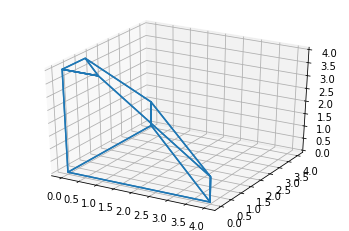

In [78]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# We can define all the edges and use plot wireframe
X = np.array([0,4,0,0,0,1,0,0,1,4,4,4,0,0,0,0])
Y = np.array([0,0,4,0,0,0,1,0,0,0,0,0,4,4,4,1])
Z0 =         [0,0,0,0,4,4,4,4,4,1,0,1,1,0,1,4]
Z = np.array([Z0,Z0])
ax.plot_wireframe(X,Y,Z)
plt.show()

In [77]:
#Now we can check the value in every vertex.
vertices = np.array([
    [0,4,0,0,4,0,1,0],
    [0,0,4,4,0,1,0,0],
    [0,0,0,1,1,4,4,4]])
for i in range(len(vertices[0])):
    x,y,z = vertices[:,i]
    print(f'({x},{y},{z}) -> {2*x+2*y+z}')

(0,0,0) -> 0
(4,0,0) -> 8
(0,4,0) -> 8
(0,4,1) -> 9
(4,0,1) -> 9
(0,1,4) -> 6
(1,0,4) -> 6
(0,0,4) -> 4


As we can see, the maximum value is equal to 9, and optimal solutions are (0,4,1) and (4,0,1)

### **Problem 1.3 (10 pts)**

Implement the simplex algorithm solving the problem
```
   minimize c^T x
   subject to Ax = b and x >= 0
```
You can assume that the initial *feasible base* (see [BFS](https://www.wikiwand.com/en/Basic_feasible_solution)) $I$ is given.<br/>
Your function should output the optimal value and the minimizer $x$.

We want to find x such that:
```
    minimize c^T x
    subject to Ax = b and x >= 0
```
Given $A$,$b$,$c$, and $I$ - initial feasible base the algorithm goes as follow:
1. $B$ - square submatrix of $A$, consisting columns with index $i \in I$ and $N$ - submatrix of $A$, consisting columns with index $j \notin I$
2. $B^{-1}$ - inverse of $B$ matrix
3. $x_{B} = B^{-1}b$
4. Calculate the current relative cost coefficients: $r_{N}^{T} = c_{N}^{T} - c_{B}^{T} B^{-1} N$
5. If $r_{N} \geq 0$ then stop
6. Select $k$ such that $r_{N}[k]$ is most negative element of $r_{N}$, $a_{k} is k-th column from A$
7. $y_{k} = B^{-1} a_{k}$
8. If no $y_{k} > 0$ then the problem is unbounded, stop
9. Calculate $\alpha = \frac{x_{B}}{y_{k}}$ and select $t$ such that $\alpha[t]$ is smallest positive value
10. $I$ = $(I \setminus \{t\}) \bigcup \{k\}$
11. Goto 1.

If problem is bounded then $c^T x_{B}$ is optimal value, and $x_{B}$ is the minimizer.

Source: Linear and Nonlinear Programming, David G. LuenbergerYinyu Ye

In [2]:
def simplex_method(I, c, A, b):
    m, n = A.shape
    N = np.array([i for i in range(n) if i not in I])
    I = np.array(I)
    b = b.reshape(-1,1)
    c = c.reshape(-1,1)
    
    while True:
        B = A[:,I]
        B_inv = inv(B)
        xb = B_inv @ b
        assert np.all(xb>=0)
        rn = (c[N].T - c[I].T @ B_inv @ A[:,N])[0]
        if np.all(rn>=0):
            break
        ii = np.argmin(rn)
        i = N[ii]
        y = B_inv @ A[:,i].reshape(-1,1)
        if np.all(y<0):
            return -np.inf, np.zeros(n)
        y += (y==0) * 1e-20
        alphas = xb/y
        ji = np.where(alphas > 0, alphas, np.inf).argmin()
        j = I[ji]
        I[ji],N[ii] = i,j
    
    x = np.zeros(n).reshape(-1,1)
    x[I] = xb
    v = (c.reshape(1,-1) @ x)[0][0]
    return v, x.reshape(-1,)

In [3]:
I = np.array([3,4,5])
A = np.array([[2,1,1,1,0,0],[1,2,3,0,1,0],[2,2,1,0,0,1]])
b = np.array([2,5,6]).reshape(-1,1)
c = np.array([-3,-1,-3,0,0,0])
simplex_method(I, c, A, b)

(-5.4, array([0.2, 0. , 1.6, 0. , 0. , 4. ]))

In [4]:
A = np.array([[1,3,0,1,1,0,0],[2,1,0,0,0,1,0],[0,1,4,1,0,0,1]])
b = np.array([4,3,3])
c = np.array([2,4,1,1,0,0,0])
I = np.array([4,5,6])
simplex_method(I, c, A, b)

(0.0, array([0., 0., 0., 0., 4., 3., 3.]))

In [5]:
A = np.array([[1,3,0,1,1,0,0],[2,1,0,0,0,1,0],[0,1,4,1,0,0,1]])
b = np.array([4,3,3])
c = np.array([2,4,1,1,0,0,0])
I = np.array([0,1,2])
simplex_method(I, c, A, b)

(0.0, array([0., 0., 0., 0., 4., 3., 3.]))

In [6]:
A = np.array([[1,1,1,1,0,0,],[1,1,0,0,1,0],[0,0,1,0,0,1]])
b = np.array([5,4,4])
c = np.array([-2,-2,-1,0,0,0])
I = np.array([3,4,5])
simplex_method(I, c, A, b)

(-9.0, array([4., 0., 1., 0., 0., 3.]))

In [7]:
tests = np.load('simplex_test_data.npz',allow_pickle=True)['data'].item()

In [8]:
for i,test in tests.items():
    A,b,c,f,x,I = test['A'], test['b'], test['c'], test['f'], test['x'], test['I']
    if i>=31:
        # In tests 31-40 x size is 51, where A shape is (20,50)
        x = x[:-1]
    sf,sx = simplex_method(I,c,A,b)
    print(f'Test #{i}')
    if np.isclose(f,sf) and np.allclose(x,sx):
        print('Correct!')
    else:
        #print(f'correct solution: {f}, for x: {x}\nmy solution: {sf}, for x: {sx}')
        print(f'F absolute difference: {np.round(np.abs(f-sf),5)}, relative error: {np.round((np.abs(f-sf)/np.abs(f))*100,3)}%, x vectors distance: {np.round(np.sum((x-sx)**2),5)}, dist(x-my_x)/||x||: {np.round(np.sqrt(np.sum((x-sx)**2))/np.sqrt(np.sum(x**2)),5)}')
    print()

Test #1
Correct!

Test #2
Correct!

Test #3
Correct!

Test #4
Correct!

Test #5
Correct!

Test #6
Correct!

Test #7
Correct!

Test #8
Correct!

Test #9
Correct!

Test #10
Correct!

Test #11
Correct!

Test #12
Correct!

Test #13
Correct!

Test #14
Correct!

Test #15
Correct!

Test #16
Correct!

Test #17
Correct!

Test #18
Correct!

Test #19
Correct!

Test #20
Correct!

Test #21
Correct!

Test #22
Correct!

Test #23
Correct!

Test #24
Correct!

Test #25
Correct!

Test #26
Correct!

Test #27
Correct!

Test #28
Correct!

Test #29
Correct!

Test #30
Correct!

Test #31
Correct!

Test #32
Correct!

Test #33
F absolute difference: 0.00785, relative error: 0.038%, x vectors distance: 0.21616, dist(x-my_x)/||x||: 0.14315

Test #34
F absolute difference: 0.55971, relative error: 4.388%, x vectors distance: 1.90837, dist(x-my_x)/||x||: 0.30879

Test #35
F absolute difference: 0.01092, relative error: 0.196%, x vectors distance: 0.19547, dist(x-my_x)/||x||: 0.09132

Test #36
F absolute difference: 

As we can see, my solution works correctly for most of the cases. For some bigger tests, I have a bit different solutions, probably because of numerical errors.